# Linear Regression variants,KNN and Random Forest tested on Ripple

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns

In [2]:
ripple=pd.read_excel(r'/Users/radhikagarg/Desktop/TP TERM 3/TP/data/XRP.xlsx',sheet_name="ripple")
print(ripple.tail())

           Date    Price     Open     High      Low          Vol.  Change %  \
1156 2021-03-02  0.43582  0.44546  0.45414  0.42297  9.204900e+08   -0.0218   
1157 2021-03-03  0.44844  0.43582  0.46723  0.43140  9.170300e+08    0.0290   
1158 2021-03-04  0.48088  0.44844  0.49380  0.43623  1.830000e+09    0.0723   
1159 2021-03-05  0.45501  0.48091  0.48278  0.44664  1.170000e+09   -0.0538   
1160 2021-03-06  0.46296  0.45498  0.47019  0.44991  5.756500e+08    0.0175   

           MktCap  Tradecount  
1156  19834171592      337346  
1157  20444486466      379740  
1158  22093842734      637627  
1159  20800453451      410780  
1160  21117695564      248640  


# EDA RIPPLE

Text(0.5, 1.0, 'RIPPLE PRICES')

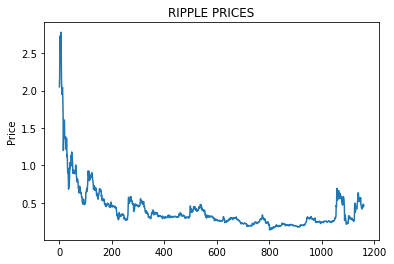

In [3]:
sns.lineplot(data=ripple['Price'])
plt.title("RIPPLE PRICES")

<AxesSubplot:>

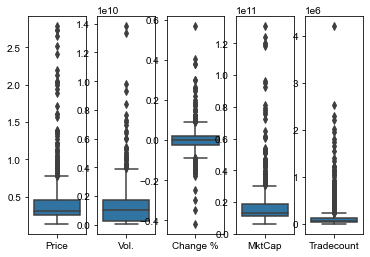

In [4]:
fig, axs = plt.subplots(ncols=5)
sns.set_style("whitegrid")
sns.boxplot(data=ripple[['Price']],ax=axs[0])
sns.boxplot(data=ripple[['Vol.']],ax=axs[1])
sns.boxplot(data=ripple[['Change %']],ax=axs[2])
sns.boxplot(data=ripple[['MktCap']],ax=axs[3])
sns.boxplot(data=ripple[['Tradecount']],ax=axs[4])

<AxesSubplot:>

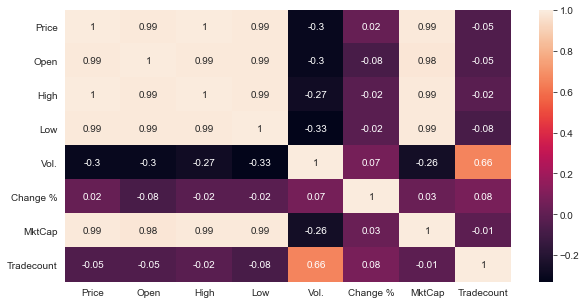

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(ripple.corr().round(2), annot=True)

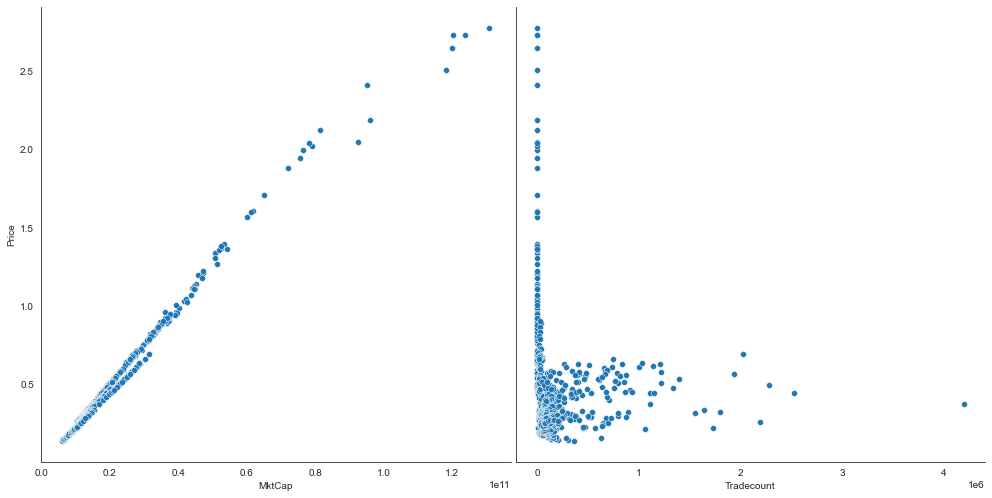

In [6]:
sns.set_style("white")
sns.pairplot(ripple,x_vars=['MktCap','Tradecount'],y_vars='Price',height=7,kind='scatter',diag_kind=None)

In [7]:
import scipy as scipy
from scipy.stats.mstats import normaltest
print(normaltest(ripple['Price']))

NormaltestResult(statistic=988.3508418425595, pvalue=2.411801726253086e-215)


In [8]:
from scipy.stats import boxcox

def boxcox_transformation(a):
    boxcox_res=boxcox(a)
    print(boxcox_res)
    boxcox_y=boxcox_res[0] # as it has two outputs one the ransformed array and the lambda used to transform
    return boxcox_y
    
boxcox_ripple_price=boxcox_transformation(ripple.Price)

print(normaltest(boxcox_ripple_price))

(array([ 0.54672311,  0.58305214,  0.69131398, ..., -0.99394507,
       -1.09523775, -1.06302838]), -0.7965262450957062)
NormaltestResult(statistic=13.273406471675026, pvalue=0.0013113433150385356)


# LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics

x=ripple[['MktCap','Tradecount']]
y=boxcox_ripple_price

lr=LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
mean_mse=np.mean(mse)
print("\nMean Negative square from CV=5")
print(mean_mse)

Mean Absolute Error: 0.5257846987923439
Mean Squared Error: 0.5470828521889002
Root Mean Squared Error: 0.7396504932661778
INTERCEPT -3.0407055814661317 

COEFS [6.80312651e-11 2.99555818e-07] 

R_SQUARED 0.5653212138235657 


Mean Negative square from CV=5
-3.6169063069383824


           0
344  0.62135
345  0.25471
346  0.43458
347  0.22097
348  0.22595
            0
344  0.486127
345  0.276926
346  0.317353
347  0.278598
348  0.266260


Text(0.5, 1.0, 'Linear Regression')

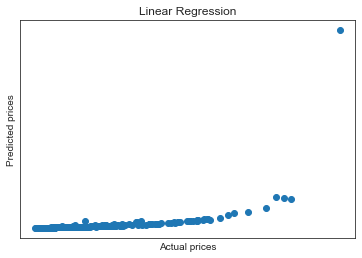

In [10]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.7965262450957062)
price_pred=inv_boxcox(y_pred,-0.7965262450957062)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Linear Regression")

# HUBBER REGRESSION

In [10]:
#HuberRegressor model;Huber loss is a loss function used in robust regression that is less sensitive to outliers 
#in data than the squared error loss. The Hubber Regressor provided by scikit-learn optimizes the squared loss and
#absolute loss for the samples based on epsilon, where epsilon is a parameter to control the number of samples 
#which should be treated as outliers.

from sklearn.linear_model import HuberRegressor

x=ripple[['MktCap','Tradecount']]
y=boxcox_ripple_price

hr=HuberRegressor(alpha=0.0, epsilon=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=hr.fit(x_train,y_train)
y_pred = hr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 1.582329648499915
Mean Squared Error: 4.2711985334349425
Root Mean Squared Error: 2.066687817120656
INTERCEPT -9.577864634672615e-20 

COEFS [-7.64278872e-11 -6.16056886e-15] 

R_SQUARED -2.5045301435453715 


Mean Negative square from CV=5
-3.6169063069383776


         0
0  0.22404
1  0.29725
2  0.26544
3  0.44603
4  0.46869
          0
0  0.557217
1  0.485120
2  0.516026
3  0.401713
4  0.388147


Text(0.5, 1.0, 'Hubber Regression')

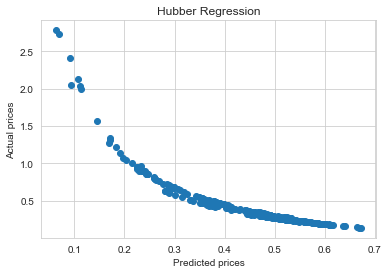

In [11]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.7965262450957062)
price_pred=inv_boxcox(y_pred,-0.7965262450957062)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.head())
print(y_pred_data.head())

plt.scatter(y_pred_data,y_test_data)
plt.xlabel("Predicted prices")
plt.ylabel("Actual prices")
plt.title("Hubber Regression")

# POLYNOMIAL REGRESSION

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x=ripple[['MktCap','Tradecount']]
y=boxcox_ripple_price


# TRAINING ERROR PER DEGREE
train_rmse_errors = [] #Saving root mean square for the train set
# TEST ERROR PER DEGREE
test_rmse_errors = [] #Saving root mean square for the test set

for d in range(1,10): #Choose any range you want, the larger the range you test, the more degrees you take into account.
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False) #d is from 1 to 10, we don't want array of 1 as features.
    poly_features = polynomial_converter.fit_transform(x)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred)) #Notice we have y train here
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred)) #Notice we have y test here

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [12]:
train_rmse_errors

[0.6510113538096276,
 0.3974359036707859,
 0.6317933195722097,
 0.7882900350252766,
 0.8831789799120012,
 0.9233275646969592,
 0.9440344017941941,
 0.9559247909923057,
 0.9634355635862725]

In [13]:
test_rmse_errors

[0.7396504932661778,
 0.44889990134235447,
 1.2705623801963435,
 1.4563690530514983,
 1.037035458345457,
 1.065242902379318,
 1.0795081471243104,
 1.0894276795294142,
 1.0949413568827024]

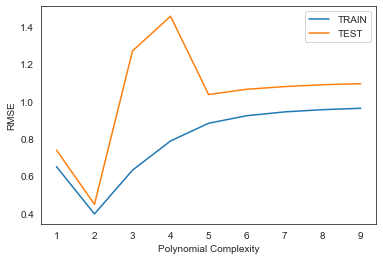

In [14]:
plt.plot(range(1,10),train_rmse_errors[:9],label='TRAIN')
plt.plot(range(1,10),test_rmse_errors[:9],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

# No need for polunomial model

In [17]:
x=ripple[['MktCap','Tradecount']]

polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(x)
y=boxcox_ripple_price
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3,  random_state=101)
pr = LinearRegression(fit_intercept=True)
model=pr.fit(x_train,y_train)
y_pred = pr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(poly_features,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.33695133326377025
Mean Squared Error: 0.20151132431285676
Root Mean Squared Error: 0.4489001273255074
INTERCEPT -4.155691629976032 

COEFS [ 0.00000000e+00  1.64510788e-10 -6.32073751e-16 -1.13243611e-21
  1.02481143e-17 -1.18338043e-13] 

R_SQUARED 0.8386723801558607 


Mean Negative square from CV=5
-3.6169063069383824


           0
344  0.62135
345  0.25471
346  0.43458
347  0.22097
348  0.22595
            0
344  0.757972
345  0.261254
346  0.344517
347  0.245095
348  0.241750


Text(0.5, 1.0, 'Polynomial Regression')

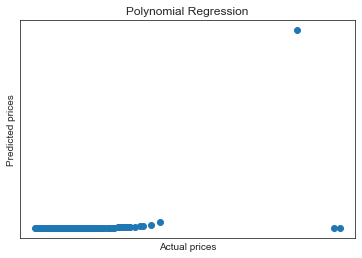

In [18]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.7965262450957062)
price_pred=inv_boxcox(y_pred,-0.7965262450957062)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Polynomial Regression")

# ELASTICNET

In [19]:
from sklearn.linear_model import ElasticNetCV

x=ripple[['MktCap','Tradecount']]
y=boxcox_ripple_price

lr= ElasticNetCV(l1_ratio=0.5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.5309131829156828
Mean Squared Error: 0.5197319775198527
Root Mean Squared Error: 0.7209243909869139
INTERCEPT -2.9107147484534948 

COEFS [6.26470947e-11 0.00000000e+00] 

R_SQUARED 0.5667933930545269 


Mean Negative square from CV=5
-2.0970965776067554


           0
344  0.62135
345  0.25471
346  0.43458
347  0.22097
348  0.22595
            0
344  0.441974
345  0.281730
346  0.321673
347  0.272557
348  0.271417


Text(0.5, 1.0, 'ElasticNet')

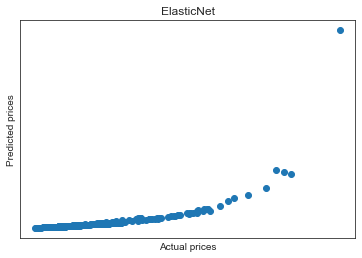

In [20]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.7965262450957062)
price_pred=inv_boxcox(y_pred,-0.7965262450957062)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("ElasticNet")

# KNN

In [21]:
# Grid Search for Parameter Tuning 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV

x=ripple[['MktCap','Tradecount']]
y=boxcox_ripple_price


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model = KNeighborsRegressor(n_neighbors=10)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
knn = model.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(knn,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)


Mean Absolute Error: 0.0752047591126343
Mean Squared Error: 0.010968659110830158
Root Mean Squared Error: 0.10473136641345876
R_SQUARED 0.9922146882392455 


Mean Negative square from CV=5
-0.08119189345368405


           0
344  0.62135
345  0.25471
346  0.43458
347  0.22097
348  0.22595
            0
344  0.653955
345  0.261727
346  0.409751
347  0.226850
348  0.225322


Text(0.5, 1.0, 'KNN Regression')

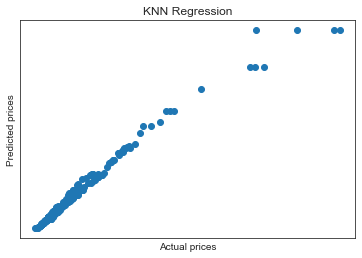

In [22]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.7965262450957062)
price_pred=inv_boxcox(y_pred,-0.7965262450957062)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("KNN Regression")

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

x=ripple[['MktCap','Tradecount']]
y=boxcox_ripple_price

# Model for best neighbour
model = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
rf = model.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(knn,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)


Mean Absolute Error: 0.04328968866644412
Mean Squared Error: 0.00432361410747819
Root Mean Squared Error: 0.0657541945998747
R_SQUARED 0.9984825378074388 


Mean Negative square from CV=5
-0.08119189345368405


           0
344  0.62135
345  0.25471
346  0.43458
347  0.22097
348  0.22595
            0
344  0.615448
345  0.254980
346  0.432253
347  0.225540
348  0.223628


Text(0.5, 1.0, 'RandomForest Regression')

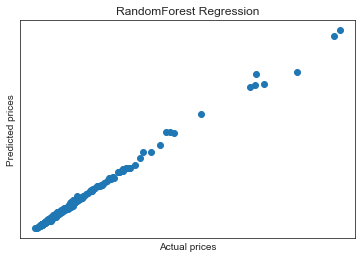

In [24]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.7965262450957062)
price_pred=inv_boxcox(y_pred,-0.7965262450957062)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("RandomForest Regression")